In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_curve, auc
from sklearn.metrics import accuracy_score, classification_report, roc_curve, auc, confusion_matrix, mean_squared_error
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt

In [ ]:
# Step 1: Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, roc_curve, auc, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/data.csv')
print(df.head())

   fever  cold  rigor  fatigue  headace  bitter  vomitting  diarrhea  \
0      1     1      0        1        1       1          0         1   
1      1     1      1        1        1       1          0         1   
2      1     1      1        1        1       0          0         1   
3      1     1      0        1        0       0          0         0   
4      1     1      1        0        1       0          0         0   

   Convulsion  Anemia  jundice  cocacola  hypoglycemia  prostraction  \
0           1       0        1         1             1             0   
1           0       0        0         1             1             0   
2           1       0        0         1             1             0   
3           0       0        1         0             1             0   
4           1       0        1         1             1             0   

   hyperpyrexia  maleria  
0             0        0  
1             0        0  
2             0        1  
3             1        0  

In [ ]:
# view dimensions of dataset
df.shape

(1011, 16)

In [ ]:
# let's preview the dataset
df.head()

,fever,cold,rigor,fatigue,headace,bitter,vomitting,diarrhea,Convulsion,Anemia,jundice,cocacola,hypoglycemia,prostraction,hyperpyrexia,maleria
0,1,1,0,1,1,1,0,1,1,0,1,1,1,0,0,0
1,1,1,1,1,1,1,0,1,0,0,0,1,1,0,0,0
2,1,1,1,1,1,0,0,1,1,0,0,1,1,0,0,1
3,1,1,0,1,0,0,0,0,0,0,1,0,1,0,1,0
4,1,1,1,0,1,0,0,0,1,0,1,1,1,0,0,0


In [ ]:
df.columns

Index(['fever', 'cold', 'rigor', 'fatigue', 'headace', 'bitter', 'vomitting',
       'diarrhea', 'Convulsion', 'Anemia', 'jundice', 'cocacola',
       'hypoglycemia', 'prostraction', 'hyperpyrexia', 'maleria'],
      dtype='object')

In [ ]:
df['maleria'].value_counts()

maleria
0    663
1    348
Name: count, dtype: int64

In [ ]:
X = df.drop(['maleria'], axis=1)

y = df['maleria']

In [ ]:
# split X and y into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [ ]:
X_train.shape, X_test.shape

((808, 15), (203, 15))

In [ ]:
cols = X_train.columns

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
X_train = pd.DataFrame(X_train, columns=[cols])
X_test = pd.DataFrame(X_test, columns=[cols])

In [ ]:
# import SVC classifier
from sklearn.svm import SVC
# import metrics to compute accuracy
from sklearn.metrics import accuracy_score
# instantiate classifier with default hyperparameters
svc=SVC()
# fit classifier to training set
svc.fit(X_train,y_train)
# make predictions on test set
y_pred=svc.predict(X_test)
# compute and print accuracy score
print('Model accuracy score with default hyperparameters: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with default hyperparameters: 0.8030


In [ ]:
# instantiate classifier with rbf kernel and C=100
#svc=SVC(C=100.0)
#linear_svc=SVC(kernel='linear', C=100)
# fit classifier to training set
svc=SVC(kernel='rbf', C=1000)
# fit classifier to training set
svc.fit(X_train,y_train)
# make predictions on test set
y_pred=svc.predict(X_test)
# compute and print accuracy score
print('Model accuracy score with rbf kernel and C=100.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with rbf kernel and C=100.0 : 0.9458


[[128   6]
 [  5  64]]


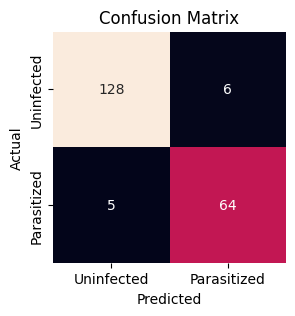

In [ ]:
#Confusion Matrix - verify accuracy of each class
import sys
from sklearn.metrics import confusion_matrix
nClasses = ['Uninfected','Parasitized']
plt.figure(figsize=(3,3))
cm = confusion_matrix(y_test, y_pred)
print(cm)
plt.title('Confusion Matrix')
#sns.heatmap(cm, annot=True)
#sns.heatmap(cm, cbar=False, xticklabels=classes, yticklabels=classes, fmt='d', annot=True, cmap=plt.cm.Blues)
sns.heatmap(cm, cbar=False, xticklabels=nClasses, yticklabels=nClasses, fmt='d', annot=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
from sklearn.metrics import classification_report
#target_names = ["Class {}".format(i) for i in range(num_classes)]
#plt.title('Classification Report Before Image Preprocessing')
print(classification_report(y_test, y_test_pred, target_names=['Uninfected   (Class 0)','Parasitized (Class 1)']))

                        precision    recall  f1-score   support

Uninfected   (Class 0)       0.80      0.93      0.86       134
 Parasitized (Class 1)       0.81      0.55      0.66        69

              accuracy                           0.80       203
             macro avg       0.80      0.74      0.76       203
          weighted avg       0.80      0.80      0.79       203



In [ ]:
# Step 1: Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, roc_curve, auc, confusion_matrix, mean_squared_error

import matplotlib.pyplot as plt
import seaborn as sns
# Step 9: Compute ROC and AUC for binary classification
# Step 5: Create and train the SVM classifier

svc=SVC(kernel='rbf',probability=True, C=100.0)# probability=True for ROC curve and AUC
svc.fit(X_train, y_train)
fpr, tpr, thresholds = roc_curve(y_test, svc.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)

[[128   6]
 [  5  64]]


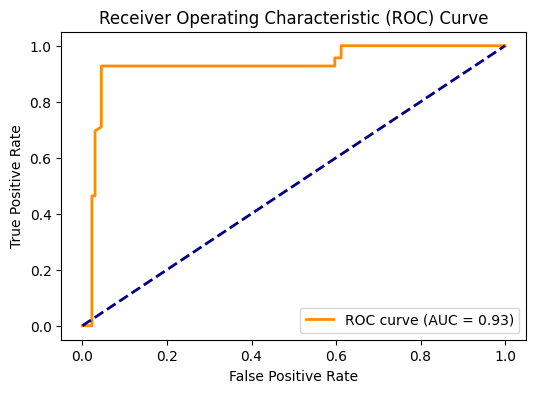

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_curve, auc, precision_recall_curve, average_precision_score

# Assuming svc is the trained Support Vector Machine model
# and X_test, y_test are the test data and labels
y_pred = svc.predict(X_test)
y_pred_proba = svc.predict_proba(X_test)[:, 1]

# Step 1: Compute ROC and AUC for binary classification
fpr, tpr, roc_thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Step 2: Compute Precision-Recall curve and average precision
precision, recall, pr_thresholds = precision_recall_curve(y_test, y_pred_proba)
average_precision = average_precision_score(y_test, y_pred_proba)

# Step 3: Compute AUC for Precision-Recall curve (AUC-PR)
pr_auc = auc(recall, precision)

# Step 4: Compute confusion matrix
nClasses = ['Uninfected', 'Parasitized']
cm = confusion_matrix(y_test, y_pred)
print(cm)

# Plot ROC curve
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

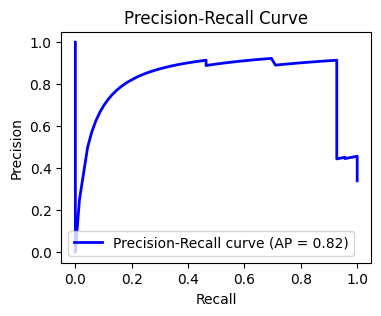

In [ ]:
# Plot Precision-Recall curve
plt.figure(figsize=(4, 3))
plt.plot(recall, precision, color='blue', lw=2, label=f'Precision-Recall curve (AP = {average_precision:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')
plt.show()



In [ ]:
# Step 5: Create and train the SVM classifier
svm_classifier = SVC(probability=True)  # Probability=True allows computing decision function scores
svm_classifier.fit(X_train, y_train)

SVC(probability=True)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
y_train_pred = svm_classifier.predict(X_train)
# Step 7: Make predictions on the test set
y_test_pred = svm_classifier.predict(X_test)

# Step 8: Evaluate the performance of the model
training_accuracy = accuracy_score(y_train, y_train_pred)
testing_accuracy = accuracy_score(y_test, y_test_pred)

print(f"Training Accuracy: {training_accuracy:.2f}")
print(f"Testing Accuracy: {testing_accuracy:.2f}")

Training Accuracy: 0.86
Testing Accuracy: 0.80


In [ ]:
from sklearn.metrics import classification_report
#target_names = ["Class {}".format(i) for i in range(num_classes)]
#plt.title('Classification Report Before Image Preprocessing')
print(classification_report(y_test, y_test_pred, target_names=['Parasitized  (Class 0)','Uninfected (Class 1)']))

                        precision    recall  f1-score   support

Parasitized  (Class 0)       0.80      0.93      0.86       134
  Uninfected (Class 1)       0.81      0.55      0.66        69

              accuracy                           0.80       203
             macro avg       0.80      0.74      0.76       203
          weighted avg       0.80      0.80      0.79       203



# **rbf kernel**

[[128   6]
 [  5  64]]


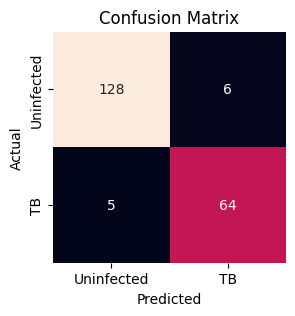

In [ ]:
#Confusion Matrix - verify accuracy of each class
import sys
from sklearn.metrics import confusion_matrix
nClasses = ['Uninfected','Parasitized']
plt.figure(figsize=(3,3))
cm = confusion_matrix(y_test, y_pred)
print(cm)
plt.title('Confusion Matrix')
#sns.heatmap(cm, annot=True)
#sns.heatmap(cm, cbar=False, xticklabels=classes, yticklabels=classes, fmt='d', annot=True, cmap=plt.cm.Blues)
sns.heatmap(cm, cbar=False, xticklabels=nClasses, yticklabels=nClasses, fmt='d', annot=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
from sklearn.metrics import classification_report
#target_names = ["Class {}".format(i) for i in range(num_classes)]
#plt.title('Classification Report Before Image Preprocessing')
print(classification_report(y_test, y_test_pred, target_names=['Parasitized  (Class 0)','Uninfected (Class 1)']))

                        precision    recall  f1-score   support

Parasitized  (Class 0)       0.80      0.93      0.86       134
  Uninfected (Class 1)       0.81      0.55      0.66        69

              accuracy                           0.80       203
             macro avg       0.80      0.74      0.76       203
          weighted avg       0.80      0.80      0.79       203



In [ ]:
# Step 1: Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, roc_curve, auc, confusion_matrix, mean_squared_error

import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Step 9: Compute ROC and AUC for binary classification
# Step 5: Create and train the SVM classifier

svc=SVC(kernel='rbf',probability=True, C=100.0)# probability=True for ROC curve and AUC
svc.fit(X_train, y_train)
fpr, tpr, thresholds = roc_curve(y_test, svc.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)

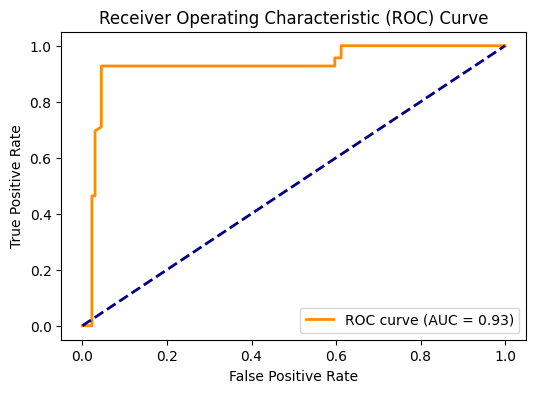

In [ ]:
# Step 9: Compute ROC and AUC for binary classification
fpr, tpr, thresholds = roc_curve(y_test, svc.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)

# Step 10: Plot ROC curve for binary classification
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [ ]:
#AUC
#Area under the curve (AUC) for ROC plot can be used to understand hpw well a classifier
from sklearn.metrics import auc
auc_value = auc(fpr, tpr)
print("Area under curve, AUC = ", auc_value)

Area under curve, AUC =  0.9285096257841229


In [ ]:
# Step 12: Compute and print Root Mean Squared Error (RMSE) for the decision function
decision_function_train = svc.decision_function(X_train)
decision_function_test = svc.decision_function(X_test)

rmse_train = mean_squared_error(y_train, decision_function_train, squared=False)
rmse_test = mean_squared_error(y_test, decision_function_test, squared=False)

print(f"RMSE on Training Set: {rmse_train:.2f}")
print(f"RMSE on Testing Set: {rmse_test:.2f}")

RMSE on Training Set: 1.04
RMSE on Testing Set: 1.09


# **precision_recall_curve**

[[128   6]
 [  5  64]]


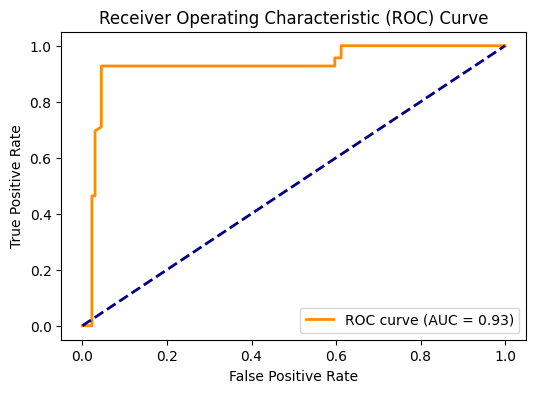

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_curve, auc, precision_recall_curve, average_precision_score

# Assuming svc is the trained Support Vector Machine model
# and X_test, y_test are the test data and labels
y_pred = svc.predict(X_test)
y_pred_proba = svc.predict_proba(X_test)[:, 1]

# Step 1: Compute ROC and AUC for binary classification
fpr, tpr, roc_thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Step 2: Compute Precision-Recall curve and average precision
precision, recall, pr_thresholds = precision_recall_curve(y_test, y_pred_proba)
average_precision = average_precision_score(y_test, y_pred_proba)

# Step 3: Compute AUC for Precision-Recall curve (AUC-PR)
pr_auc = auc(recall, precision)

# Step 4: Compute confusion matrix
nClasses = ['Uninfected', 'Parasitized']
cm = confusion_matrix(y_test, y_pred)
print(cm)

# Plot ROC curve
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

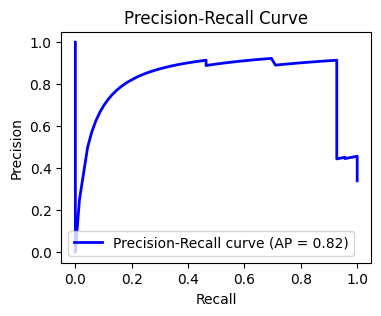

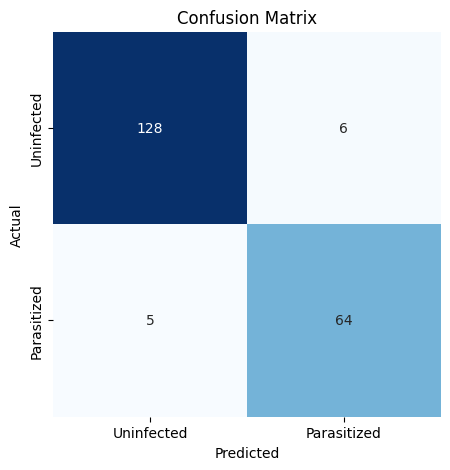

In [ ]:
# Plot Precision-Recall curve
plt.figure(figsize=(4, 3))
plt.plot(recall, precision, color='blue', lw=2, label=f'Precision-Recall curve (AP = {average_precision:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')
plt.show()

# Plot confusion matrix
plt.figure(figsize=(3, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap=plt.cm.Blues, xticklabels=nClasses, yticklabels=nClasses, cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# **linear kernel**

In [ ]:
# split X and y into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 42)

In [ ]:
# instantiate classifier with linear kernel and C=1.0
linear_svc=SVC(kernel='linear', C=100)
# fit classifier to training set
linear_svc.fit(X_train,y_train)
# make predictions on test set
y_pred_test=linear_svc.predict(X_test)
# compute and print accuracy score
print('Model accuracy score with linear kernel and C=1.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred_test)))

Model accuracy score with linear kernel and C=1.0 : 0.6513


In [ ]:
# Step 6: Make predictions on the training set
y_train_pred = linear_svc.predict(X_train)
y_pred_test = linear_svc.predict(X_test)
# Step 8: Evaluate the performance of the model
training_accuracy = accuracy_score(y_train, y_train_pred)
testing_accuracy = accuracy_score(y_test, y_pred_test)
print(f"Training Accuracy: {training_accuracy:.2f}")
print(f"Testing Accuracy: {testing_accuracy:.2f}")

Training Accuracy: 0.65
Testing Accuracy: 0.66


[[103   0]
 [  0  97]]


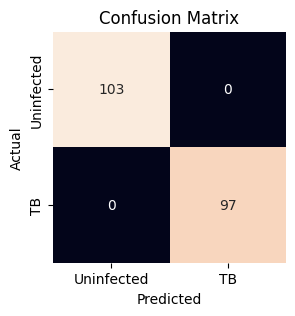

In [ ]:
#Confusion Matrix - verify accuracy of each class
import sys
from sklearn.metrics import confusion_matrix
nClasses = ['Uninfected','TB']
plt.figure(figsize=(3,3))
cm = confusion_matrix(y_test, y_pred_test)
print(cm)
plt.title('Confusion Matrix')
#sns.heatmap(cm, annot=True)
#sns.heatmap(cm, cbar=False, xticklabels=classes, yticklabels=classes, fmt='d', annot=True, cmap=plt.cm.Blues)
sns.heatmap(cm, cbar=False, xticklabels=nClasses, yticklabels=nClasses, fmt='d', annot=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
# print the scores on training and test set
print('Training set score: {:.4f}'.format(linear_svc.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(linear_svc.score(X_test, y_test)))


Training set score: 1.0000
Test set score: 1.0000


In [ ]:
from sklearn.metrics import classification_report
#target_names = ["Class {}".format(i) for i in range(num_classes)]
#plt.title('Classification Report Before Image Preprocessing')
print(classification_report(y_test, y_pred_test, target_names=['Uninfected(Class 0)','TB(Class 1)']))

                     precision    recall  f1-score   support

Uninfected(Class 0)       1.00      1.00      1.00       103
        TB(Class 1)       1.00      1.00      1.00        97

           accuracy                           1.00       200
          macro avg       1.00      1.00      1.00       200
       weighted avg       1.00      1.00      1.00       200



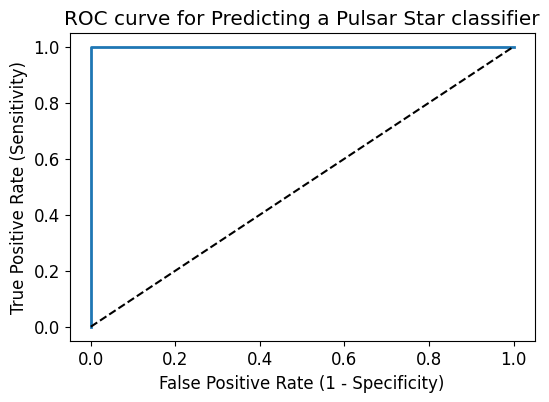

In [ ]:
# plot ROC Curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, linewidth=2)
plt.plot([0,1], [0,1], 'k--' )
plt.rcParams['font.size'] = 12
plt.title('ROC curve for Predicting a Pulsar Star classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.show()

In [ ]:
#AUC
#Area under the curve (AUC) for ROC plot can be used to understand hpw well a classifier
from sklearn.metrics import auc
auc_value = auc(fpr, tpr)
print("Area under curve, AUC = ", auc_value)

Area under curve, AUC =  1.0


In [ ]:
# Step 9: Compute ROC and AUC for binary classification
# Step 5: Create and train the SVM classifier
linear_svc = SVC(probability=True)  # probability=True for ROC curve and AUC
linear_svc.fit(X_train, y_train)
fpr, tpr, thresholds = roc_curve(y_test, linear_svc.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)

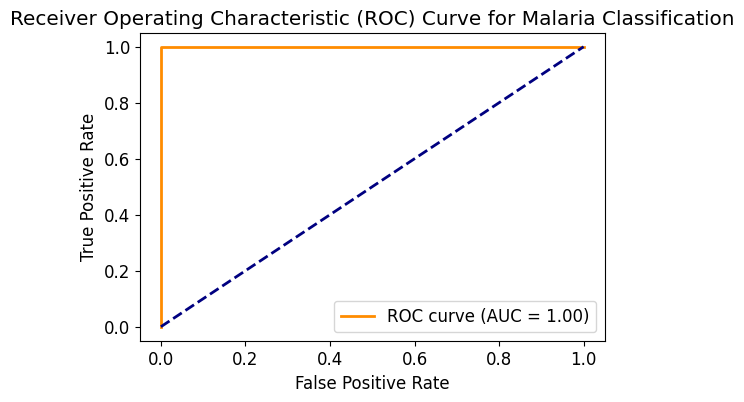

In [ ]:
# Step 9: Compute ROC and AUC for binary classification
fpr, tpr, thresholds = roc_curve(y_test, linear_svc.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)

# Step 10: Plot ROC curve for binary classification
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Malaria Classification')
plt.legend(loc='lower right')
plt.show()

In [ ]:
# Step 12: Compute and print Root Mean Squared Error (RMSE) for the decision function
decision_function_train = linear_svc.decision_function(X_train)
decision_function_test = linear_svc.decision_function(X_test)

rmse_train = mean_squared_error(y_train, decision_function_train, squared=False)
rmse_test = mean_squared_error(y_test, decision_function_test, squared=False)

print(f"RMSE on Training Set: {rmse_train:.2f}")
print(f"RMSE on Testing Set: {rmse_test:.2f}")

RMSE on Training Set: 1.53
RMSE on Testing Set: 1.45


# **polynomial kernel**

In [ ]:
# split X and y into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)

In [ ]:
# instantiate classifier with polynomial kernel and C=1.0
poly_svc=SVC(kernel='rbf', C=100,probability=True)
# fit classifier to training set
poly_svc.fit(X_train,y_train)
# make predictions on test set
y_pred=poly_svc.predict(X_test)
# compute and print accuracy score
print('Model accuracy score with polynomial kernel and C=1.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with polynomial kernel and C=1.0 : 0.9458


In [ ]:
# Step 6: Make predictions on the training set
y_train_pred = poly_svc.predict(X_train)
y_predd = poly_svc.predict(X_test)
# Step 8: Evaluate the performance of the model
training_accuracy = accuracy_score(y_train, y_train_pred)
testing_accuracy = accuracy_score(y_test, y_pred)
print(f"Training Accuracy: {training_accuracy:.2f}")
print(f"Testing Accuracy: {testing_accuracy:.2f}")

Training Accuracy: 0.98
Testing Accuracy: 0.95


[[128   6]
 [  5  64]]


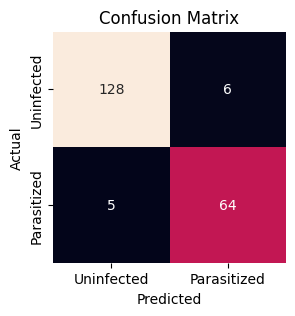

In [ ]:
#Confusion Matrix - verify accuracy of each class
import sys
from sklearn.metrics import confusion_matrix
nClasses = ['Uninfected','Parasitized']
plt.figure(figsize=(3,3))
cm = confusion_matrix(y_test, y_pred)
print(cm)
plt.title('Confusion Matrix')
#sns.heatmap(cm, annot=True)
#sns.heatmap(cm, cbar=False, xticklabels=classes, yticklabels=classes, fmt='d', annot=True, cmap=plt.cm.Blues)
sns.heatmap(cm, cbar=False, xticklabels=nClasses, yticklabels=nClasses, fmt='d', annot=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
from sklearn.metrics import classification_report
#target_names = ["Class {}".format(i) for i in range(num_classes)]
#plt.title('Classification Report Before Image Preprocessing')
print(classification_report(y_test, y_pred, target_names=['Uninfected   (Class 0)','Parasitized (Class 1)']))

                        precision    recall  f1-score   support

Uninfected   (Class 0)       0.96      0.96      0.96       134
 Parasitized (Class 1)       0.91      0.93      0.92        69

              accuracy                           0.95       203
             macro avg       0.94      0.94      0.94       203
          weighted avg       0.95      0.95      0.95       203



[[128   6]
 [  5  64]]


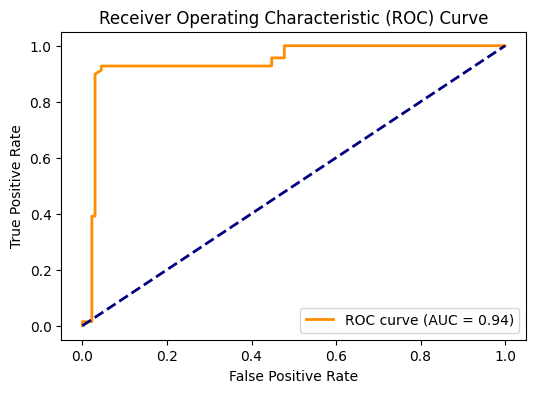

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_curve, auc, precision_recall_curve, average_precision_score

# Assuming svc is the trained Support Vector Machine model
# and X_test, y_test are the test data and labels
y_pred = poly_svc.predict(X_test)
y_pred_proba = poly_svc.predict_proba(X_test)[:, 1]

# Step 1: Compute ROC and AUC for binary classification
fpr, tpr, roc_thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Step 2: Compute Precision-Recall curve and average precision
precision, recall, pr_thresholds = precision_recall_curve(y_test, y_pred_proba)
average_precision = average_precision_score(y_test, y_pred_proba)

# Step 3: Compute AUC for Precision-Recall curve (AUC-PR)
pr_auc = auc(recall, precision)

# Step 4: Compute confusion matrix
nClasses = ['Uninfected', 'Parasitized']
cm = confusion_matrix(y_test, y_pred)
print(cm)

# Plot ROC curve
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

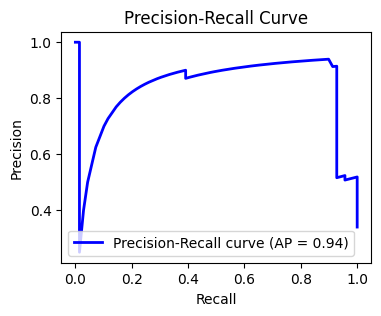

In [ ]:
# Plot Precision-Recall curve
plt.figure(figsize=(4, 3))
plt.plot(recall, precision, color='blue', lw=2, label=f'Precision-Recall curve (AP = {roc_auc:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')
plt.show()

In [ ]:
#AUC
#Area under the curve (AUC) for ROC plot can be used to understand hpw well a classifier
from sklearn.metrics import auc
auc_value = auc(fpr, tpr)
print("Area under curve, AUC = ", auc_value)

Area under curve, AUC =  1.0


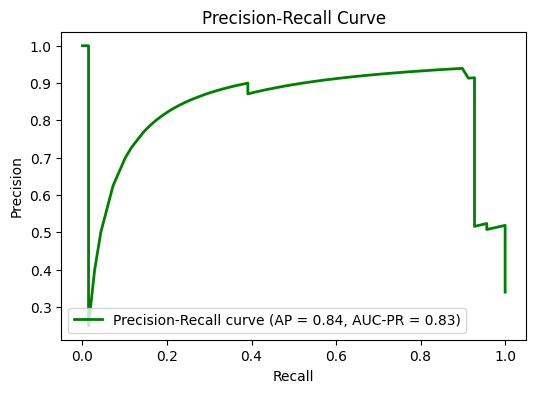

In [ ]:
# Plot Precision-Recall curve
plt.figure(figsize=(6, 4))
plt.plot(recall, precision, color='green', lw=2, label=f'Precision-Recall curve (AP = {average_precision:.2f}, AUC-PR = {pr_auc:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')
plt.show()

In [ ]:
# Step 9: Compute ROC and AUC for binary classification
fpr, tpr, thresholds = roc_curve(y_test, poly_svc.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)

# Step 10: Plot ROC curve for binary classification
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Malaria Classification')
plt.legend(loc='lower right')
plt.show()

AttributeError: predict_proba is not available when  probability=False

In [ ]:
# Step 12: Compute and print Root Mean Squared Error (RMSE) for the decision function
decision_function_train = poly_svc.decision_function(X_train)
decision_function_test = poly_svc.decision_function(X_test)

rmse_train = mean_squared_error(y_train, decision_function_train, squared=False)
rmse_test = mean_squared_error(y_test, decision_function_test, squared=False)

print(f"RMSE on Training Set: {rmse_train:.2f}")
print(f"RMSE on Testing Set: {rmse_test:.2f}")

RMSE on Training Set: 3.69
RMSE on Testing Set: 3.29


# **sigmoid kernel**

# New Section

In [ ]:
# split X and y into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 0)

In [ ]:
# instantiate classifier with sigmoid kernel and C=1.0
sigmoid_svc=SVC(kernel='sigmoid', C=1.0)
# fit classifier to training set
sigmoid_svc.fit(X_train,y_train)
# make predictions on test set
y_pred=sigmoid_svc.predict(X_test)
# compute and print accuracy score
print('Model accuracy score with sigmoid kernel and C=1.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with sigmoid kernel and C=1.0 : 0.2267


In [ ]:
# Step 6: Make predictions on the training set
y_train_pred = sigmoid_svc.predict(X_train)
y_pred = sigmoid_svc.predict(X_test)
# Step 8: Evaluate the performance of the model
training_accuracy = accuracy_score(y_train, y_train_pred)
testing_accuracy = accuracy_score(y_test, y_pred)
print(f"Training Accuracy: {training_accuracy:.2f}")
print(f"Testing Accuracy: {testing_accuracy:.2f}")

Training Accuracy: 0.20
Testing Accuracy: 0.23


[[ 15 139]
 [ 93  53]]


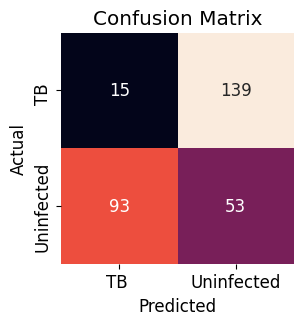

In [ ]:
#Confusion Matrix - verify accuracy of each class
import sys
from sklearn.metrics import confusion_matrix
nClasses = ['TB ','Uninfected']
plt.figure(figsize=(3,3))
cm = confusion_matrix(y_test, y_pred)
print(cm)
plt.title('Confusion Matrix')
#sns.heatmap(cm, annot=True)
#sns.heatmap(cm, cbar=False, xticklabels=classes, yticklabels=classes, fmt='d', annot=True, cmap=plt.cm.Blues)
sns.heatmap(cm, cbar=False, xticklabels=nClasses, yticklabels=nClasses, fmt='d', annot=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
from sklearn.metrics import classification_report
#target_names = ["Class {}".format(i) for i in range(num_classes)]
#plt.title('Classification Report Before Image Preprocessing')
print(classification_report(y_test, y_pred, target_names=['TB  (Class 0)','Uninfected (Class 1)']))

                      precision    recall  f1-score   support

       TB  (Class 0)       0.14      0.10      0.11       154
Uninfected (Class 1)       0.28      0.36      0.31       146

            accuracy                           0.23       300
           macro avg       0.21      0.23      0.21       300
        weighted avg       0.21      0.23      0.21       300



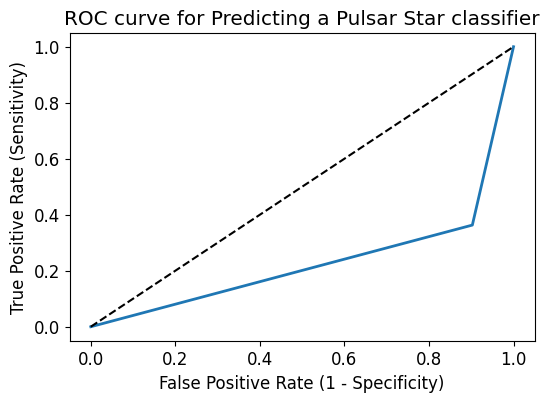

In [ ]:
# plot ROC Curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, linewidth=2)
plt.plot([0,1], [0,1], 'k--' )
plt.rcParams['font.size'] = 12
plt.title('ROC curve for Predicting a Pulsar Star classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.show()

In [ ]:
#AUC
#Area under the curve (AUC) for ROC plot can be used to understand hpw well a classifier
from sklearn.metrics import auc
auc_value = auc(fpr, tpr)
print("Area under curve, AUC = ", auc_value)

Area under curve, AUC =  0.2302081480163672


In [ ]:
# Step 9: Compute ROC and AUC for binary classification
# Step 5: Create and train the SVM classifier
sigmoid_svc = SVC(kernel='sigmoid',probability=True)  # probability=True for ROC curve and AUC
sigmoid_svc.fit(X_train, y_train)
fpr, tpr, thresholds = roc_curve(y_test, sigmoid_svc.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)

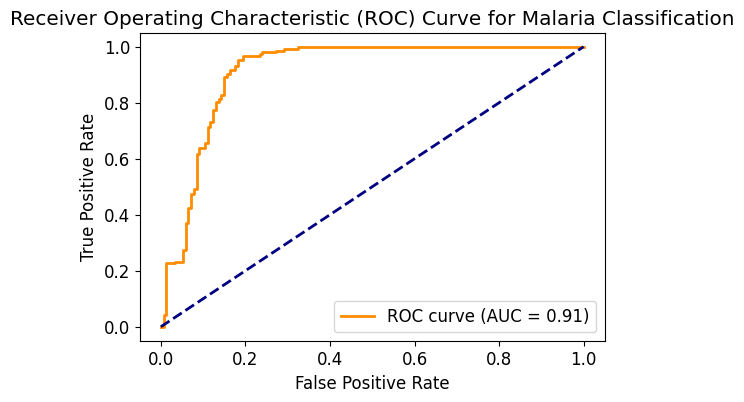

In [ ]:
# Step 9: Compute ROC and AUC for binary classification
fpr, tpr, thresholds = roc_curve(y_test, sigmoid_svc.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)

# Step 10: Plot ROC curve for binary classification
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Malaria Classification')
plt.legend(loc='lower right')
plt.show()

In [ ]:
# Step 12: Compute and print Root Mean Squared Error (RMSE) for the decision function
decision_function_train = sigmoid_svc.decision_function(X_train)
decision_function_test = sigmoid_svc.decision_function(X_test)

rmse_train = mean_squared_error(y_train, decision_function_train, squared=False)
rmse_test = mean_squared_error(y_test, decision_function_test, squared=False)

print(f"RMSE on Training Set: {rmse_train:.2f}")
print(f"RMSE on Testing Set: {rmse_test:.2f}")

RMSE on Training Set: 7.28
RMSE on Testing Set: 6.31
